# 1. Loading the required libraries 

In [2]:
# Import the required libraries

# Data manipulation and math operations
import pandas as pd  # For data manipulation and DataFrame operations
import numpy as np  # For numerical operations and array handling

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # For text feature extraction
from sklearn.ensemble import RandomForestClassifier  # For classification using Random Forests
from sklearn.metrics import accuracy_score, classification_report  # For evaluating classification performance

# Additional preprocessing libraries
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical variables
from sklearn.preprocessing import StandardScaler  # For standardizing features

# Regression model and evaluation
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import mean_squared_error  # For calculating mean squared error (MSE) as an evaluation metric

# System libraries
import warnings  # For managing warning messages
import sys  # For system-specific parameters and functions
import os  # For interacting with the operating system

# Ignore all warnings (useful for ignoring non-critical warnings)
warnings.filterwarnings("ignore")

# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Custom utilities
from utils_finance import *  # Import custom functions from utils_finance module


# 2. Searching for existing models and loading them

# 3 Searching for training data 

In [8]:
# Retrieving data 

# Path to the neighboring 'data' folder in the local repository
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data'))
print(data_path)


# Open "Training_Data.csv" and store it in a DataFrame called df
training_data_path = os.path.join(data_path, "Training_Data.csv")
print(training_data_path)
df = pd.read_csv(training_data_path)
print(f"Loaded Training_Data.csv with shape: {df.shape}")
print("Column names:", df.columns)

/Users/tillo/Repositoriums/FinanceGrouper/data
/Users/tillo/Repositoriums/FinanceGrouper/data/Training_Data.csv


ParserError: Error tokenizing data. C error: Expected 2 fields in line 10, saw 3


In [ ]:
inspect_data(df)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
# Assuming you have a DataFrame 'df' with columns 'description' (text) and 'category' (target label)
df = pd.DataFrame({
    'description': [
        'Develop and maintain software applications', 
        'Design marketing campaigns and strategies', 
        'Manage customer relationships and sales',
        'Analyze and report financial data'
    ],
    'category': ['Engineering', 'Marketing', 'Sales', 'Finance']
})



In [10]:

# Save the concatenated DataFrame to "Data_All_Years.csv"
output_path = os.path.join(data_path, "Training_Data.csv")
df.to_csv(output_path, index=False, sep=';')
print(f"Concatenated DataFrame saved to: {output_path}")



Concatenated DataFrame saved to: /Users/tillo/Repositoriums/FinanceGrouper/data/Training_Data.csv


In [ ]:

# Step 2: Split the data into training and testing sets
X = df['description']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Convert text to numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test_tfidf)

# Step 6: Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



# Next possible steps: 
# Relableing 
# Time Series analysis of income with prediction
# All functions in the src file -> better overview 
# Make all the output into a text file with nice formating 
# Save all the plots also in the overview file (maybe rtf??)
# Make categorizer 
# Execute this with a dummy file into the data bevore publishing 
https://www.mockaroo.com/
# Deployment of already existing machine learning models for word categorizing: German Bert 

Data type of amounts: float64
    Year  Month  Betrag (€)
0   2022      1     3883.19
1   2022      2     2233.19
2   2022      3     1583.19
3   2022      4     1883.19
4   2022      5     1883.19
5   2022      6     1643.73
6   2022      7     1593.28
7   2022      8     4193.28
8   2022      9     1814.28
9   2022     10     1657.25
10  2022     11     3450.92
11  2022     12     2317.55
12  2023      1      999.00
13  2023      2     2650.00
14  2023      3      999.00
15  2023      4      999.00
16  2023      5      999.00
17  2023      6     1669.92
18  2023      7     2232.32
19  2023      8     2137.32
20  2023      9     2137.32
21  2023     10     2137.32
22  2023     11     2137.32
23  2023     12     2437.32
24  2024      1     3007.24
25  2024      2     2758.24
26  2024      3     2329.69
27  2024      4     2233.14
28  2024      5     2162.24
29  2024      6     1727.35
30  2024      7     1296.30
31  2024      8     1336.30
32  2024      9     1296.30
33  2024     10   

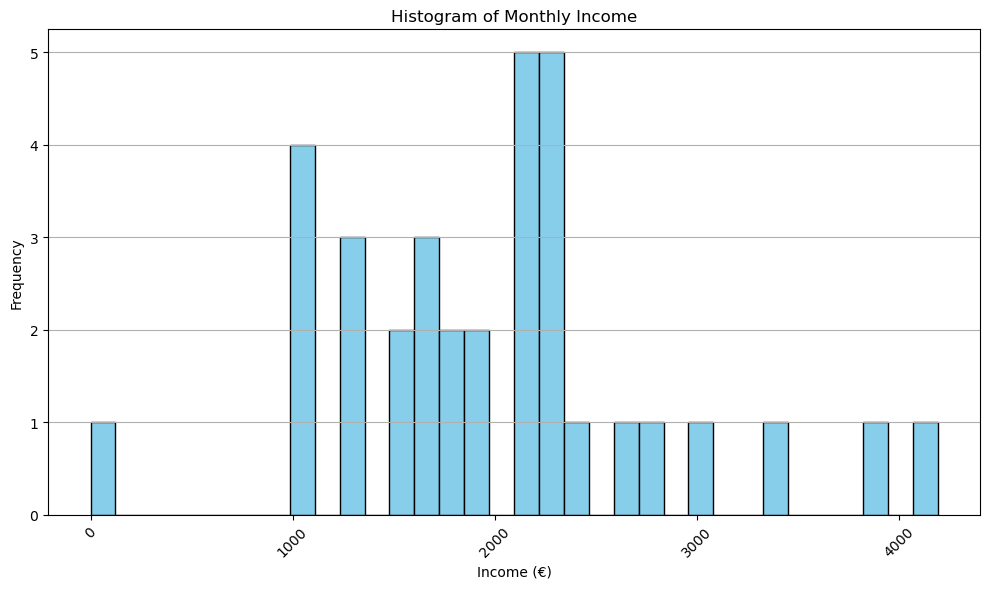

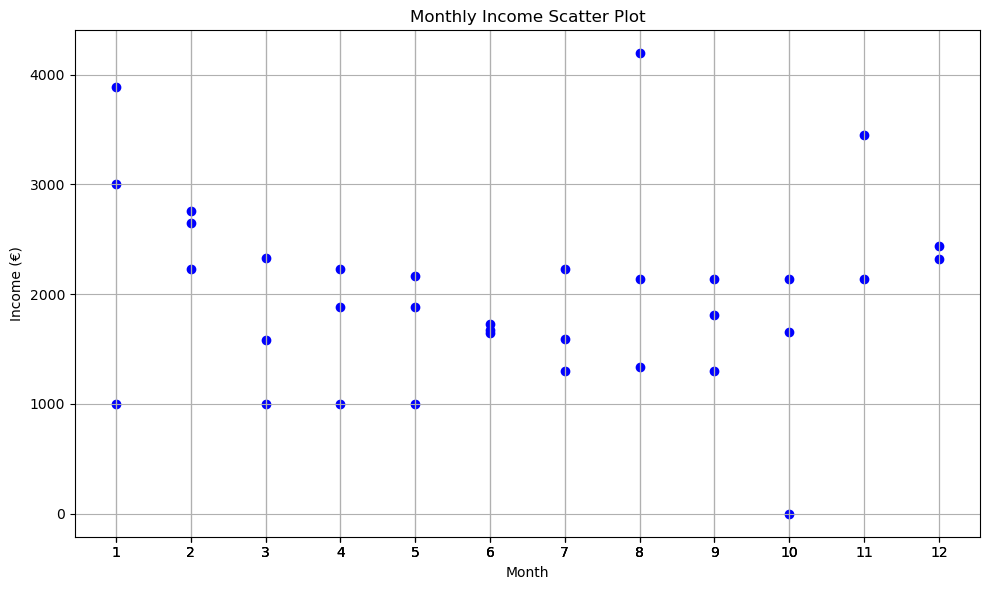

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        34 non-null     int32  
 1   Month       34 non-null     int32  
 2   Betrag (€)  34 non-null     float64
dtypes: float64(1), int32(2)
memory usage: 672.0 bytes
None


In [29]:
# Step 1: Filter the DataFrame for income transactions
income = df[df['Umsatztyp'] == 'Eingang']  # Filter for 'Income' transactions

# Step 2: Convert the 'Buchungsdatum' to datetime format
income['Buchungsdatum'] = pd.to_datetime(income['Buchungsdatum'], errors='coerce')  # Coerce errors to NaT

# Step 3: Extract Year and Month from the 'Buchungsdatum'
income['Year'] = income['Buchungsdatum'].dt.year
income['Month'] = income['Buchungsdatum'].dt.month

# Step 4: Sum the amounts by Year and Month
income_aggregated = income.groupby(['Year', 'Month'])['Betrag (€)'].sum().reset_index()

# Remove rows with NaN in the 'Betrag (€)' column
income_aggregated.dropna(subset=['Betrag (€)'], inplace=True)

# Debugging: Print the data type and the aggregated DataFrame
print("Data type of amounts:", income_aggregated['Betrag (€)'].dtype)
print(income_aggregated)


# Step: Create a histogram of income amounts
plt.figure(figsize=(10, 6))
plt.hist(income_aggregated['Betrag (€)'], bins=len(income_aggregated['Month']), color='skyblue', edgecolor='black')  # Histogram
plt.title('Histogram of Monthly Income')  # Title of the plot
plt.xlabel('Income (€)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-ticks if necessary
plt.grid(axis='y')  # Add grid lines to y-axis
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Step: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(income_aggregated['Month'], income_aggregated['Betrag (€)'], color='blue', marker='o')  # Scatter plot
plt.title('Monthly Income Scatter Plot')  # Title of the plot
plt.xlabel('Month')  # X-axis label
plt.ylabel('Income (€)')  # Y-axis label
plt.xticks(income_aggregated['Month'])  # Set x-ticks to show each month
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

print(income_aggregated.info())

### Read csv
Works for DKB csv as of 2022-12-31.

In [30]:
# Read metadata
with open(csv_file,"r",encoding="latin-1") as f:
    reader = csv.DictReader(f,delimiter=";")
    metadata = {}
    for i, row in enumerate(reader):
        if i < 3:
            key = None
            value = None
            for k, v in row.items():
                if k == "Kontonummer:":
                    key = row["Kontonummer:"]
                    continue
                if k == "":
                    continue
                value = v
            
            if ":" in key:
                key = key.replace(":","")
            if "Kontostand" in key:
                key = "Kontostand"
            if "EUR" in value:
                value = value.replace(" ","").replace("EUR","")

            metadata[key] = value
            
# print(metadata)

start_date = datetime.strptime(metadata["Von"],"%d.%m.%Y").date()
end_date = datetime.strptime(metadata["Bis"],"%d.%m.%Y").date()
end_balance = float(metadata["Kontostand"].replace(".","").replace(",","."))

NameError: name 'csv_file' is not defined

In [ ]:
print("start:",start_date)
print("end:",end_date)
print("end balance:",end_balance)

## Named Columns

In [ ]:
party = "Auftraggeber / Begünstigter"
category = "Kategorie"
amount = "Betrag (EUR)"
cause = "Verwendungszweck"
posting_text = "Buchungstext"
balance = "Kontostand (EUR)"

### Cleanup

In [ ]:
# Fix US / EU decimal-point/comma
data[amount] = data[amount].str.replace('.','')
data[amount] = data[amount].str.replace(',','.')
data[amount] = data[amount].astype('float')

# avoid nan being interpreted as float in specific columns
data[party] = data[party].astype(str)
data[cause] = data[cause].astype(str)
data[posting_text] = data[posting_text].astype(str)

In [ ]:
data.head()

### Remove small transactions to avoid noise

In [ ]:
data = data[abs(data[amount]) > 0.01]

### Inverse Dataframe to have first day first and filter by time-range

In [ ]:
from dateutil.relativedelta import relativedelta
if number_of_last_months_to_analyse > 0:
    start_date = end_date - relativedelta(months=number_of_last_months_to_analyse)
    
print(f"Analysing time range: {start_date} -> {end_date}")
data = data.loc[str(start_date):str(end_date)]
data = data.iloc[::-1]

In [ ]:
fr = data.index[0]
to = data.index[-1]
print(fr,"->",to)

### Compute balance at each transaction

In [ ]:
data_balance = data[amount].sum().round(2)
start_balance = end_balance - data_balance
data[balance] = data[amount].cumsum()+start_balance

In [ ]:
print("start",start_balance)
print("end",end_balance)
print("balance during csv timespan",data_balance)

## Balance over time

In [ ]:
data[balance].plot(
    title='Account balance DKB %s' % accountname,
    grid=True,
    figsize=(20,8)
);

## Breakdown by transaction party

In [ ]:
empfgroup = data.groupby(party).agg({amount:"sum"})

In [ ]:
# Short the names
empfgroup.index = [str(i)[:30] for i in empfgroup.index]

In [ ]:
empfgroup[amount].head()

In [ ]:
empfgroup = empfgroup.sort_values(amount,ascending=False)
gutschrift = empfgroup[amount] > 0
colors = list( map(lambda x: "g" if x else "r" , gutschrift) )

In [ ]:
empfgroup[empfgroup[amount].abs() > 50].plot.barh(
    figsize=(10,60),
    title=u'Aggregierte Zahlungen ab 50€ (%i.%i.%i - %i.%i.%i)' % (fr.day, fr.month, fr.year, to.day, to.month, to.year)
  );

In [ ]:
data.head()

# Idee wie mit torch ein modell trainiert wird das mir die categorisierung abnehmen kann 

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# Beispiel-Daten für Verwendungszwecke und Kategorien
texts = ["Kauf bei Amazon", "Krankenhauskosten", "Taxi-Gebühr", "Lebensmitteleinkauf", "Spende an WWF"]
labels = [2, 0, 1, 3, 4]  # Beispiel-Kategorien: 0 = Gesundheit, 1 = Transport, 2 = Online-Handel, 3 = Lebensmittel, 4 = Spenden

# Kategorien festlegen
category_names = ["Gesundheit", "Transport", "Online-Handel", "Lebensmittel", "Spenden"]

# Tokenizer und Modell laden
tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")
model = BertForSequenceClassification.from_pretrained("bert-base-german-cased", num_labels=len(category_names))

# Daten als Dataset formatieren
class PurposeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
        return {key: val.squeeze() for key, val in encoding.items()}, torch.tensor(label)

# Train- und Test-Daten erstellen
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2)

train_dataset = PurposeDataset(train_texts, train_labels, tokenizer)
val_dataset = PurposeDataset(val_texts, val_labels, tokenizer)

# Training konfigurieren
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Training durchführen
trainer.train()

# Beispiel für die Kategorisierung neuer Texte
def classify_text(text):
    encoding = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=64)
    outputs = model(**encoding)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    return category_names[predicted_class_id]

# Beispiel-Anwendung
new_text = "Zahlung an die Krankenkasse"
print(f"Kategorie für '{new_text}': {classify_text(new_text)}")


## Breakdown by Category
We use some heuristics on the tranasaction details to put them into different categories.
All transactions within a category will be aggregated for a better overall analysis.
You may need to check the print output of the next cell and possibly adapt the mapping function for a better categorisation.

**the text will be lower cased before categorisation**

**Feel free to change these heuristic mappings - or adapt the code to map according to specififc transaction details.**

In [ ]:
categories = {
    "eat_out_or_get_food": [
        "restaurant",
        "gastro",
        "dean david",
        "cafe",
        "baeckerei",
        "coffee fellows",
        "jim block",
        "don qui",
        "Osteria",
        "subway",
        "backhaus",
        "burger king",
        "campus suite",
        "juice.more",
        "Backerei",
        "Avni Terhani",
        "vegan",
        "thai",
        "indisch",
    ],
    "alltag_laden": [
        "lidl",
        "aldi",
        "edeka",
        "alnatura",
        "rewe",
        "vollcorner",
    ],
    "spezial_laden": [
        "karstadt",
        "galeria",
        "kaufhof",
        "mueller",
        "migros",
        "coop",
        "dm fil",
        "go asia",
        "Drogerie",
        "SUCKFUELL",
        "butlers",
        "Suckfull",
        "Bio-Market",
        "conrad m",
    ],
    "online_handel":[
        "otto",
        "conrad elec",
        "amzn mktp",
        "amazon",
    ],
    "transport": [
        "FERNVERKEHR",
        "flixbus",
        "PAYPAL .DBVERTR",
    ],
    "ausflug": [
        "hamburg",
        "Hotel",
        "PAYPAL .booking",
        "prague",
        "praha",
        "Tubingen",
    ],
    "project": [
        "openai",
        "google.cloud",
        "github",
    ],
    "freizeit": [
        "VOLKSBAD",
        "PAYPAL .SENNHEISER",
    ],
    "entertainment": [
        "magellan",
        "Amazon Prime",
        "paypal .steam",
        "netflix"
    ],
    "crypto": [
        "bitflyer",
        "coinbase"
    ],
    "health": [
        "apotheke",
        "Krankenversicherung",
    ],
    "cash": [
        "bargeld",
        "automat",
        "cash"
    ],
    "dkb": [
        "DKB",
        "KREDITBANK",
    ],
    "miete": [],
    "investment": [],
    "emergency_fund":[],
    "uncategorized": [
        "PayPal (Europe)",
    ],
    "card_payment": [],
    "minor": [ # populated automatically
    ]
}

def mapToCategory(x):
    # use these transaction details to map to a category
    p = x[party].lower()
    pt = x[posting_text].lower()
    c = x[cause].lower()
    
    # manual mappings
    if "WERTP. ABRECHN".lower() in c or "Depot ".lower() in c or "WERTPAPIER".lower() in c:
        return "investment"
    
    if "miete ".lower() in c:
        return "miete"
    
    if "KREDITKARTENABRECHNUNG".lower() in c:
        return "card_payment"
    
    # mappings by category
    for cat, cat_words in categories.items():
        if any(map(lambda r: r.lower() in p, cat_words)) or any(map(lambda r: r.lower() in pt, cat_words)):
            return cat
    
    # debitcard. may need adaptation
    if "Debitk.20 VISA Debit".lower() in c:
        return "card_payment"
    
    return p

data[category] = data.apply(lambda x: mapToCategory(x), axis=1)

print(len(data[category].unique()),"categories")

print("============ uncategorized =================")
s = 0
for x in data[category].unique():
    ok = False
    
    for cat in categories.keys():
        if x == cat:
            ok = True

    if not ok:
        print(x)
        idx = data[category] == x
        s = s + abs(data[idx][amount].sum())
        
print("================================ sum of uncategorized: ",s) # todo. this doesn't seem to make sense ... 🤔